# Road Accident India 2020

### 1. Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Regulatory Affairs of Road Accident Data 2020 India.csv")

In [4]:
df

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0
...,...,...,...,...,...
9545,Vizaq,Weather,Sunny/Clear,Greviously Injured,561.0
9546,Vizaq,Weather,Sunny/Clear,Minor Injury,252.0
9547,Vizaq,Weather,Sunny/Clear,Persons Killed,176.0
9548,Vizaq,Weather,Sunny/Clear,Total number of Accidents,1207.0


### 2. Data Cleaning & Exploration

In [5]:
df.head()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [6]:
df.columns

Index(['Million Plus Cities', 'Cause category', 'Cause Subcategory',
       'Outcome of Incident', 'Count'],
      dtype='object')

In [7]:
df.shape

(9550, 5)

In [8]:
df.isnull()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9545,False,False,False,False,False
9546,False,False,False,False,False
9547,False,False,False,False,False
9548,False,False,False,False,False


In [9]:
df.describe(include ='all')

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
count,9550,9550,9550,9550,9547.000000
unique,50,6,35,5,NaN
top,Agra,Road Features,Others,Greviously Injured,NaN
freq,191,2000,1450,2000,NaN
mean,NaN,NaN,NaN,NaN,103.627632
std,NaN,NaN,NaN,NaN,275.189303
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,12.000000
75%,NaN,NaN,NaN,NaN,70.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB


In [11]:
# Drop the 'Million Plus Cities' column
df_cleaned = df.drop(columns=['Million Plus Cities'])

In [12]:
# Display the first few rows to verify
print(df_cleaned.head())

    Cause category        Cause Subcategory        Outcome of Incident  Count
0  Traffic Control  Flashing Signal/Blinker         Greviously Injured    0.0
1  Traffic Control  Flashing Signal/Blinker               Minor Injury    0.0
2  Traffic Control  Flashing Signal/Blinker             Persons Killed    0.0
3  Traffic Control  Flashing Signal/Blinker              Total Injured    0.0
4  Traffic Control  Flashing Signal/Blinker  Total number of Accidents    0.0


In [13]:
print(df.isnull().sum())

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64


In [20]:
# Group by 'Million Plus Cities' and sum the 'Count'
accidents_by_city = df.groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False)

# Display the top 10 cities
top_10_cities = accidents_by_city.head(10)
print("Top 10 Cities with the Highest Number of Road Accidents:\n")
print(top_10_cities)


Top 10 Cities with the Highest Number of Road Accidents:

Million Plus Cities
Chennai       78459.0
Delhi         72526.0
Jabalpur      57715.0
Bengaluru     53535.0
Indore        50098.0
Bhopal        35069.0
Hyderabad     34720.0
Jaipur        32524.0
Mallapuram    32294.0
Mumbai        32106.0
Name: Count, dtype: float64


In [21]:
# Group by 'Cause category' and sum the 'Count'
common_causes = df.groupby('Cause category')['Count'].sum().sort_values(ascending=False)

# Display the top causes
print("Most Common Causes of Road Accidents:\n")
print(common_causes.head(10))


Most Common Causes of Road Accidents:

Cause category
Junction                    173308.0
Road Features               173308.0
Traffic Control             173308.0
Traffic Violation           173308.0
Weather                     173308.0
Impacting Vehicle/Object    122793.0
Name: Count, dtype: float64


### 3. Exploratory Data Analysis (EDA)

### A. Distribution of Accidents Across Cities

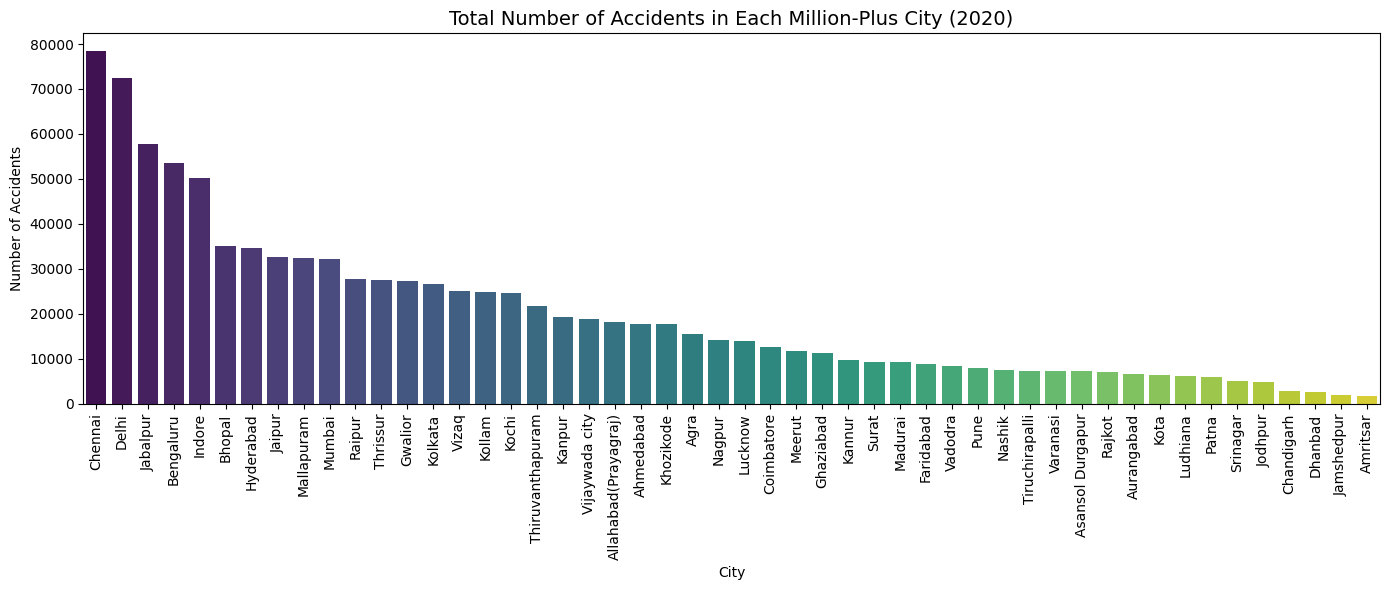

In [14]:
accidents_by_city = df.groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(x=accidents_by_city.index, y=accidents_by_city.values, palette='viridis')

plt.xticks(rotation=90)
plt.title('Total Number of Accidents in Each Million-Plus City (2020)', fontsize=14)
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

### B. Analysis of Accident Causes

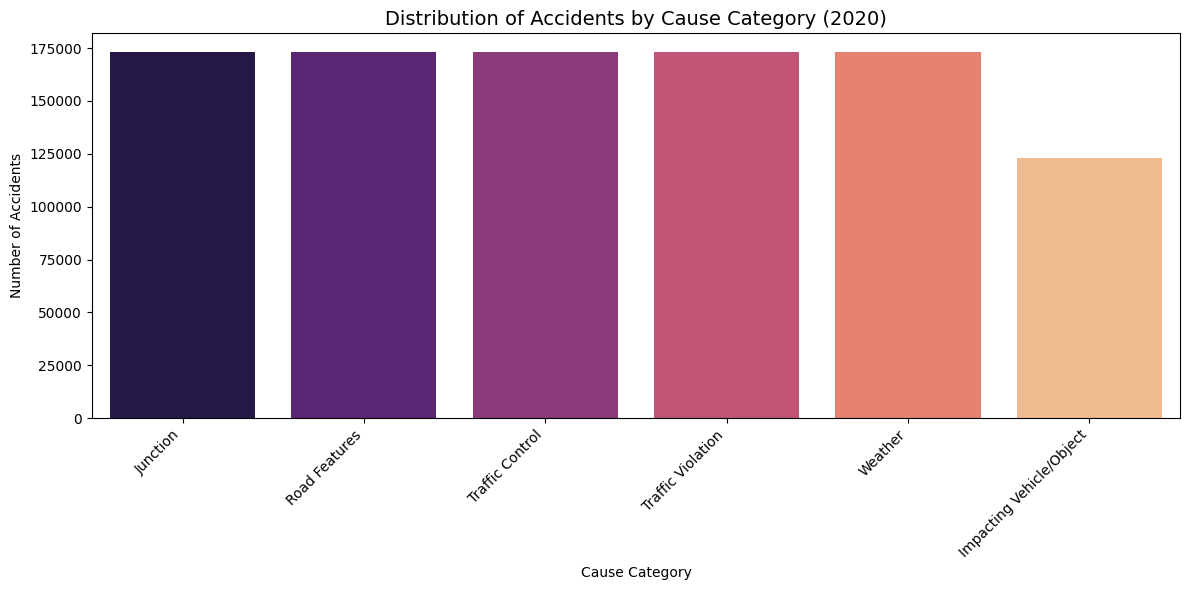

In [15]:
# Group by 'Cause category' and sum the 'Count'
cause_distribution = df.groupby('Cause category')['Count'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=cause_distribution.index, y=cause_distribution.values, palette='magma')

plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Accidents by Cause Category (2020)', fontsize=14)
plt.xlabel('Cause Category')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


### C. Outcomes of Incidents

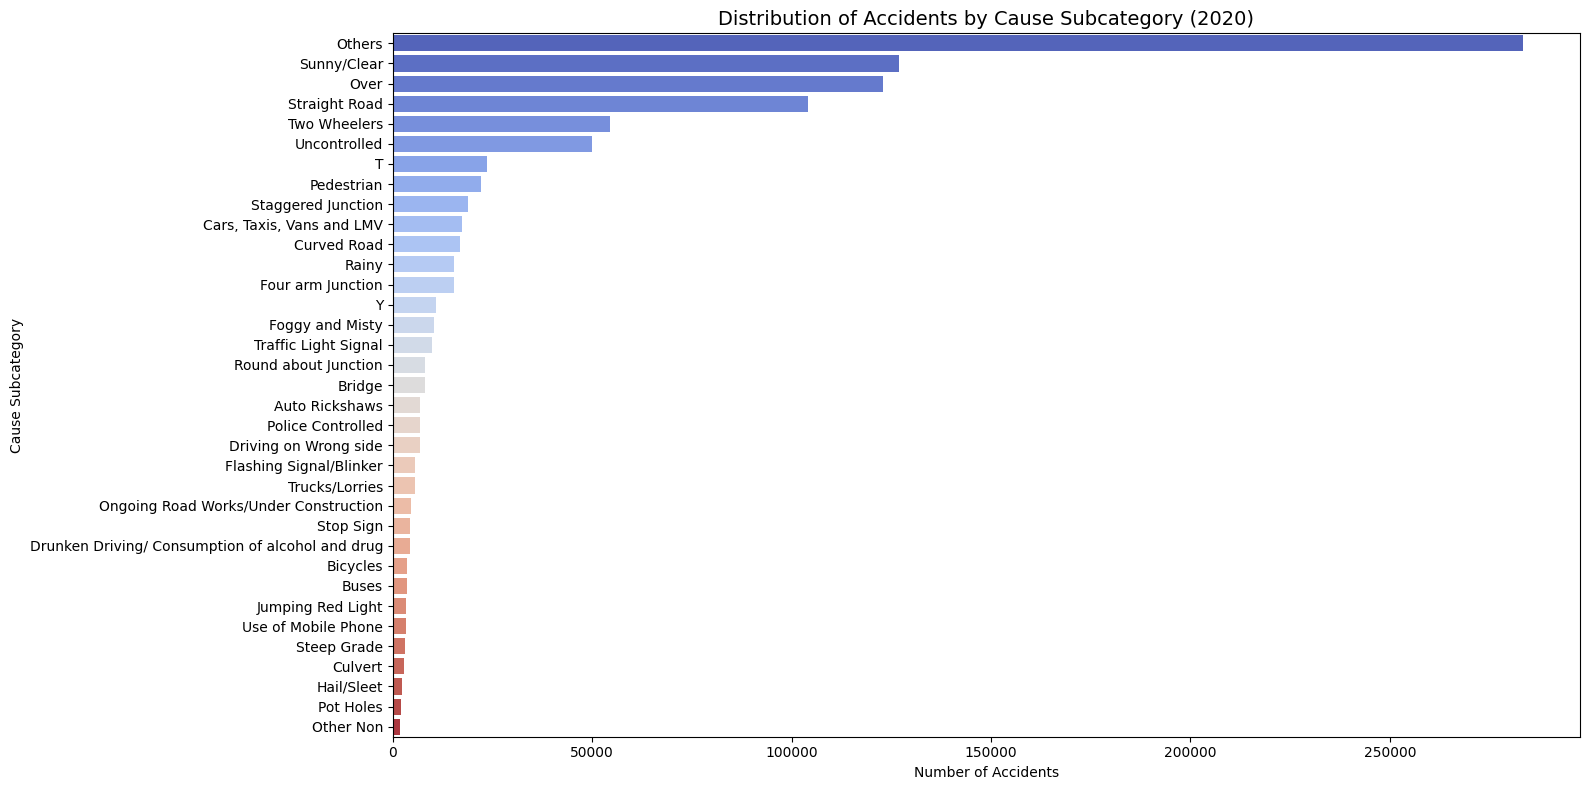

In [16]:
# Group by 'Cause Subcategory' and sum the 'Count'
subcategory_distribution = df.groupby('Cause Subcategory')['Count'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(16, 8))
sns.barplot(x=subcategory_distribution.values, y=subcategory_distribution.index, palette='coolwarm')

plt.title('Distribution of Accidents by Cause Subcategory (2020)', fontsize=14)
plt.xlabel('Number of Accidents')
plt.ylabel('Cause Subcategory')
plt.tight_layout()
plt.show()


### Distribution of Accident Counts

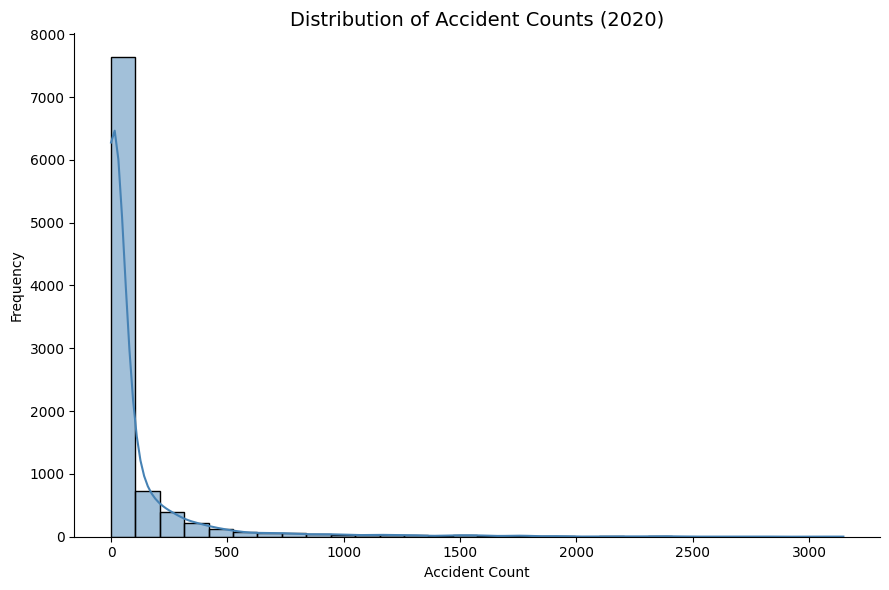

In [17]:
sns.displot(df['Count'].dropna(), kde=True, bins=30, height=6, aspect=1.5, color='steelblue')

plt.title('Distribution of Accident Counts (2020)', fontsize=14)
plt.xlabel('Accident Count')
plt.ylabel('Frequency')
plt.tight_layout()

### 5. Analyzing Accident Causes vs Outcomes

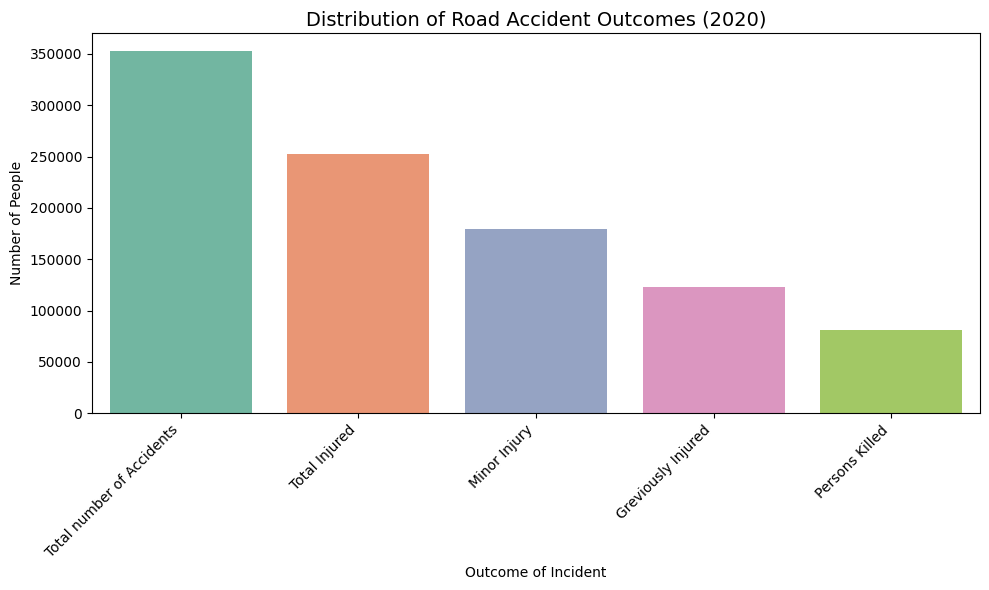

In [18]:
# Group by 'Outcome of Incident' and sum the 'Count'
outcome_distribution = df.groupby('Outcome of Incident')['Count'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=outcome_distribution.index, y=outcome_distribution.values, palette='Set2')

plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Road Accident Outcomes (2020)', fontsize=14)
plt.xlabel('Outcome of Incident')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()


### 6. Stacked Bar

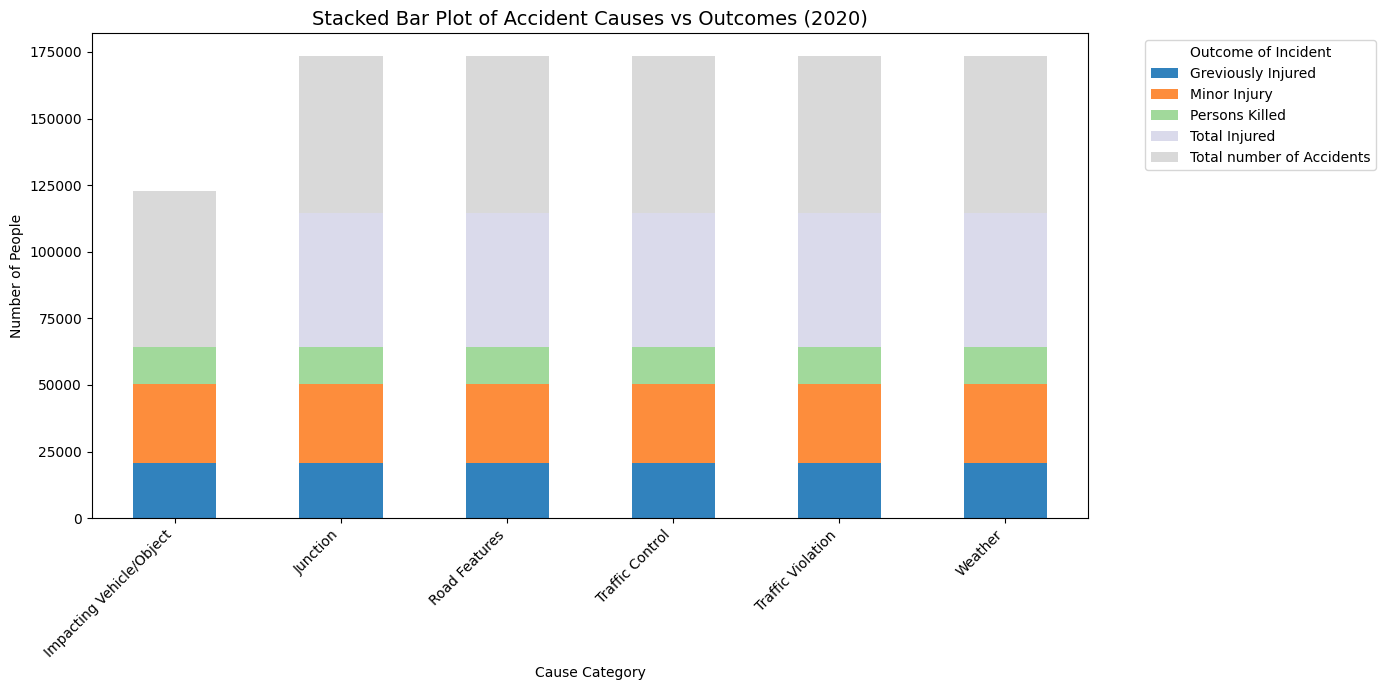

In [19]:
# Step 1: Group and sum counts by cause and outcome
grouped = df.groupby(['Cause category', 'Outcome of Incident'])['Count'].sum().unstack(fill_value=0)

# Step 2: Plot as a stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20c')

plt.title('Stacked Bar Plot of Accident Causes vs Outcomes (2020)', fontsize=14)
plt.xlabel('Cause Category')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Outcome of Incident', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


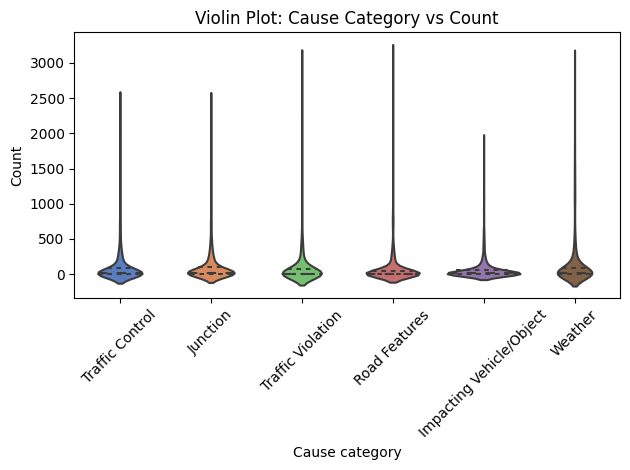

In [22]:
sns.violinplot(data=df, x='Cause category', y='Count', inner='quartile', palette='muted')
plt.xticks(rotation=45)
plt.title('Violin Plot: Cause Category vs Count')
plt.tight_layout()
plt.show()


### 7. Relationship Between Accident Causes and Outcomes

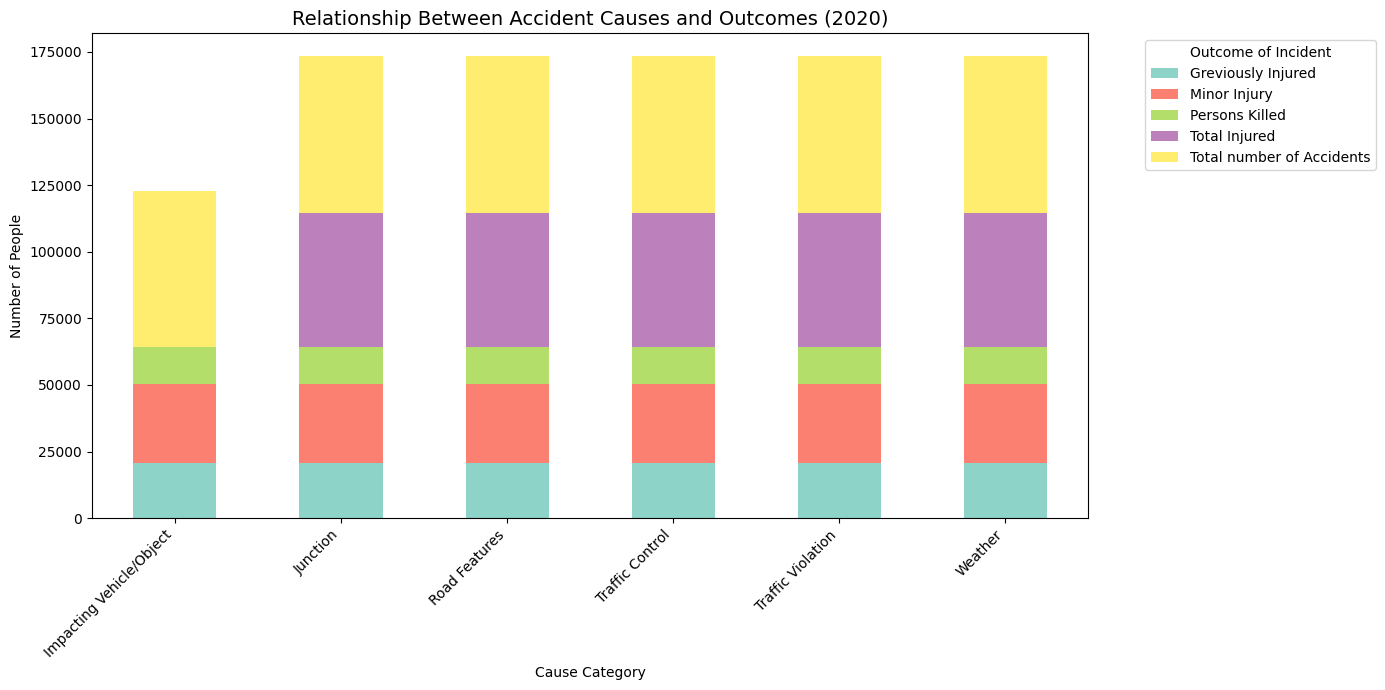

In [23]:
# Group by 'Cause category' and 'Outcome of Incident', then sum 'Count'
cause_outcome = df.groupby(['Cause category', 'Outcome of Incident'])['Count'].sum().unstack(fill_value=0)

# Plot as stacked bar chart
cause_outcome.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set3')

plt.title('Relationship Between Accident Causes and Outcomes (2020)', fontsize=14)
plt.xlabel('Cause Category')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Outcome of Incident', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 8. Boxplot

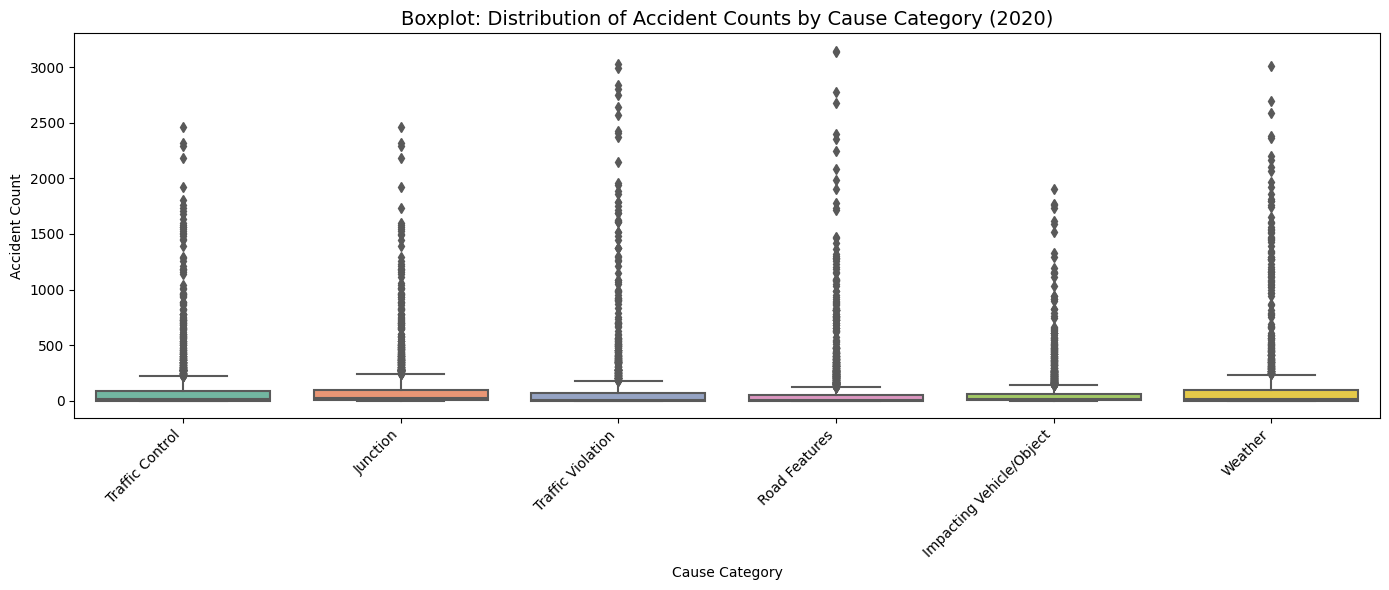

In [24]:
# Create the boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Cause category', y='Count', palette='Set2')

plt.xticks(rotation=45, ha='right')
plt.title('Boxplot: Distribution of Accident Counts by Cause Category (2020)', fontsize=14)
plt.xlabel('Cause Category')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()

### 9.Heatmap

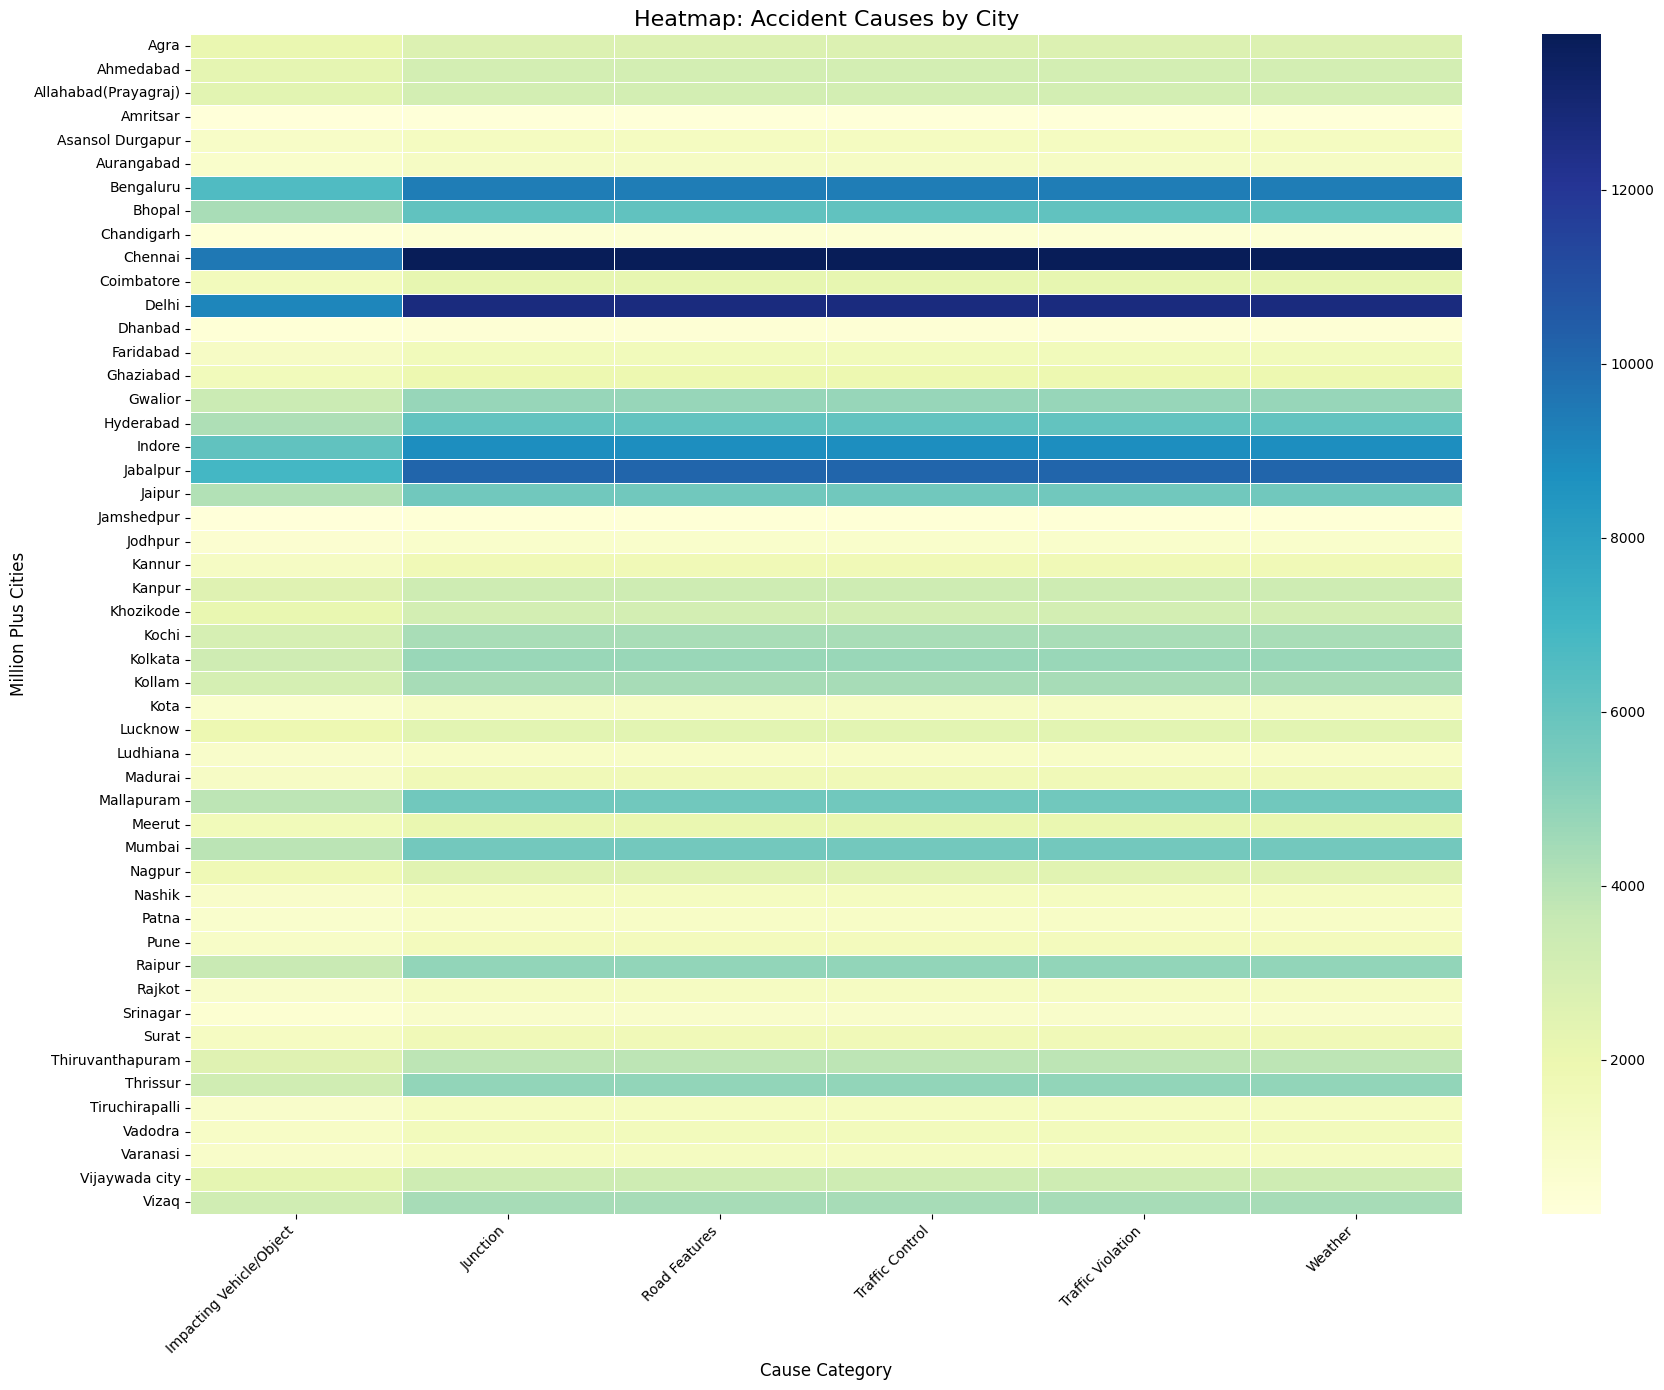

In [25]:
heatmap_data = df.pivot_table(
    index='Million Plus Cities',
    columns='Cause category',
    values='Count',
    aggfunc='sum',
    fill_value=0
)

# Plot heatmap with increased size
plt.figure(figsize=(18, 14))  # Increased width and height
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)

plt.title('Heatmap: Accident Causes by City', fontsize=16)
plt.xlabel('Cause Category', fontsize=12)
plt.ylabel('Million Plus Cities', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Tilt x-axis labels for readability
plt.yticks(fontsize=10)              # Adjust font size of city names
plt.tight_layout()
plt.show()

### 10. Save the cleaned DataFrame

In [ ]:
df.to_csv("accident_data_cleaned.csv", index=False)